# Pandas 데이터 시각화.pdf
---
> # **_실습에 필요한 데이터 다운_**
---

In [1]:
directory = './house_price.csv'

---
> # **_기본 import_**
---

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
import pandas as pd
import numpy as np

---
> # _**Basic Attributes**_
> #### parameters
> - alpha : 투명도
> - kind : 그래프 종류 'line','bar','barh','kde'
> - logy : Y축에 대해 Log scaling
> - use_index : 객체의 색인을 눈금 이름으로 사용여부
> - rot : 눈금 이름 돌리기 (rotating) 0 ~ 360
> - xticks, yticks : x,y 축으로 사용할 값
> - xlim, ylim : X,Y축의 한계
> - grid : 축의 그리드를 표현할지 여부

<br>

> #### funtions
> - subplots : 각 column에 독립된 subplot 그리기
> - sharex, sharey : subplots =True 이면 X,Y축을 공유하고 눈금과 한계 연결
> - figsize : 생성될 그래프 크기 
> - title : 그래프의 제목 지정
> - legend : subplot 의 범례 지정
> - sort_columns : column을 알파벳 순서로 그림

<br> 

> #### 한글 폰트 깨짐현상
> - 한글 폰트가 설치
> - 따라서, 한글 폰트를 설치필요
> - 네이버가 제공하는 나눔폰트 설치
---

<AxesSubplot: >

C:\Users\skyme\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\skyme\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
C:\Users\skyme\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\skyme\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\skyme\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) miss

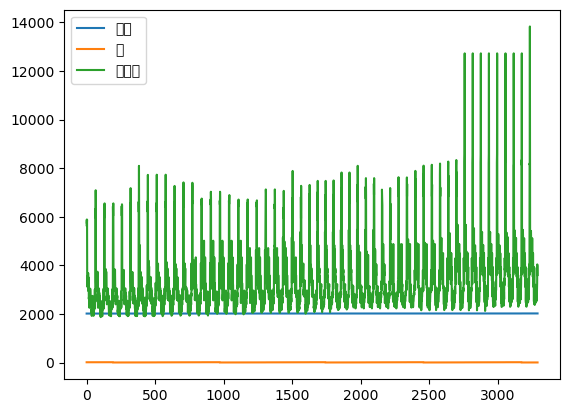

In [3]:
df = pd.read_csv(directory)
df.plot()

In [4]:
from matplotlib import font_manager, rc
font_fname = 'C://Users//skyme//OneDrive//바탕 화면//폰트//NanumFontSetup_TTF_GOTHIC//NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font',family=font_name)

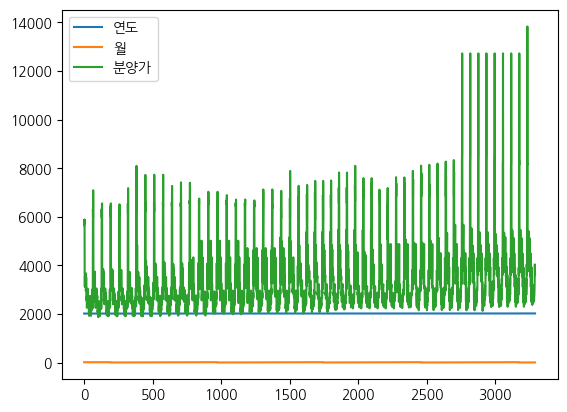

In [5]:
df = pd.read_csv(directory)
df.plot();

---
> # **_DataFrame을 활용한 시각화_**
> ##### kind 옵션 :
> - line : 선
> - bar : 바 그래프
> - barh : 수평 바 그래프
> - hist : 히스토그램
> - kde : 커널 밀도 그래프
> - hexbin : 고밀도 산점도 그래프
> - box : 박스플롯
> - area : 면적 그래프
> - pie : 파이 그래프
> - scatter : 산점도 그래프
---

<br>


---
> ## **line**
> - line 그래프는 데이터가 연속적일 경우 사용하기 적절
---

In [6]:
df

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488
...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065
3289,경남,85㎡초과 102㎡이하,2020,2,3247
3290,제주,60㎡이하,2020,2,4039
3291,제주,60㎡초과 85㎡이하,2020,2,3962


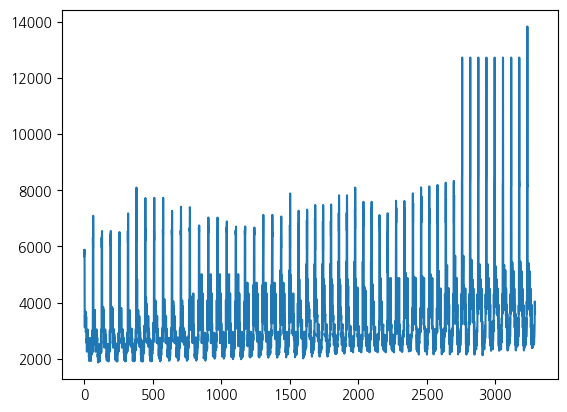

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
type(df['분양가'])
df['분양가'].plot(kind='line');

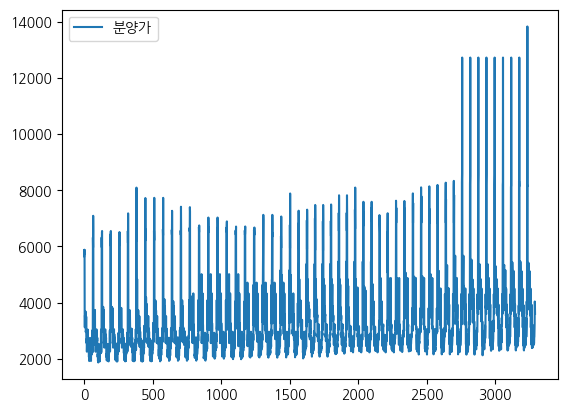

In [8]:
pd.DataFrame(df['분양가']).plot(y='분양가',kind='line');

In [9]:
df_seoul = df.loc[df['지역']=='서울']
df_seoul

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3178,서울,102㎡초과,2020,1,8779
3234,서울,60㎡이하,2020,2,8193
3235,서울,60㎡초과 85㎡이하,2020,2,8140
3236,서울,85㎡초과 102㎡이하,2020,2,13835


In [10]:
df_seoul_year = df_seoul.groupby('연도').mean()
df_seoul_year

C:\Users\skyme\AppData\Local\Temp\ipykernel_25236\1101262646.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_seoul_year = df_seoul.groupby('연도').mean()


,월,분양가
연도,,
2015,11.0,6201.000000
2016,6.5,6674.520833
2017,6.5,6658.729167
2018,6.5,7054.687500
2019,6.5,8735.083333
2020,1.5,9647.375000


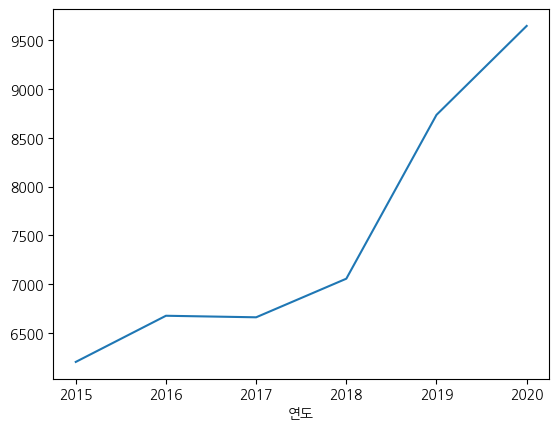

In [11]:
df_seoul_year['분양가'].plot(kind='line');

---
> ## **bar**
> - 그룹별로 비교
---

In [12]:
df

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488
...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065
3289,경남,85㎡초과 102㎡이하,2020,2,3247
3290,제주,60㎡이하,2020,2,4039
3291,제주,60㎡초과 85㎡이하,2020,2,3962


In [13]:
df.groupby('지역')['분양가'].mean()

지역
강원    2448.156863
경기    4133.952830
경남    2858.932367
경북    2570.465000
광주    3055.043750
대구    3679.620690
대전    3176.127389
부산    3691.981132
서울    7308.943396
세종    2983.543147
울산    2990.373913
인천    3684.302885
전남    2326.250000
전북    2381.416268
제주    3472.677966
충남    2534.950000
충북    2348.183962
Name: 분양가, dtype: float64

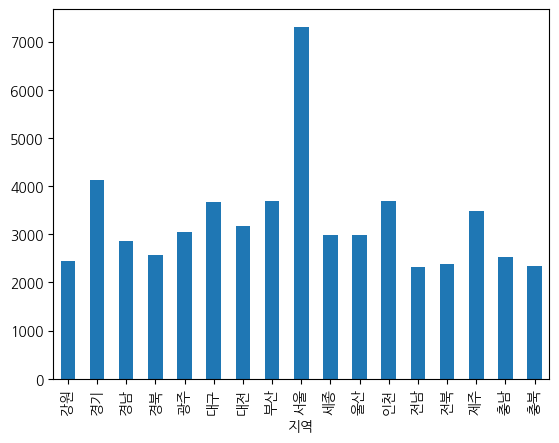

In [14]:
df.groupby('지역')['분양가'].mean().plot(kind='bar');

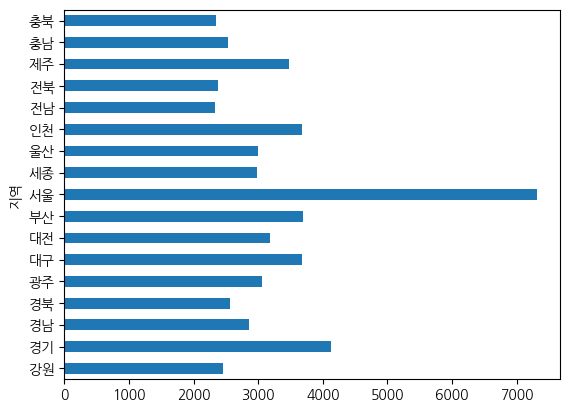

In [15]:
df.groupby('지역')['분양가'].mean().plot(kind='barh');

---
> ## **히스토그램(hist)**
> - 분포-빈도를 시각화
> - 가로축은 분포, 세로축엔 빈도
---

In [16]:
df['분양가']

0       5652
1       5882
2       5721
3       5879
4       3488
        ... 
3288    3065
3289    3247
3290    4039
3291    3962
3292    3601
Name: 분양가, Length: 3293, dtype: int64

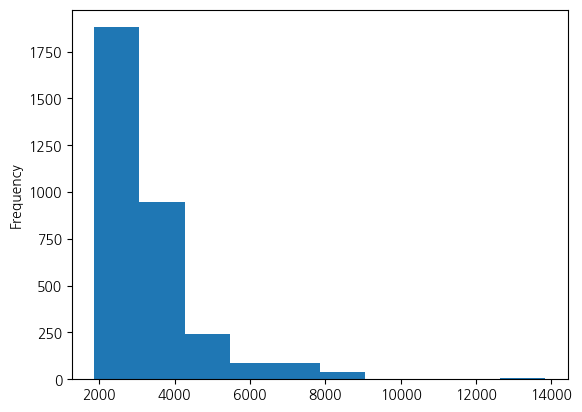

In [17]:
df['분양가'].plot(kind='hist');

---
> ## **커널 밀도 그래프**
> - 히스토그램과 유사하게 밀도 보여줌
> - 히스토그램과 유사한 모양
---

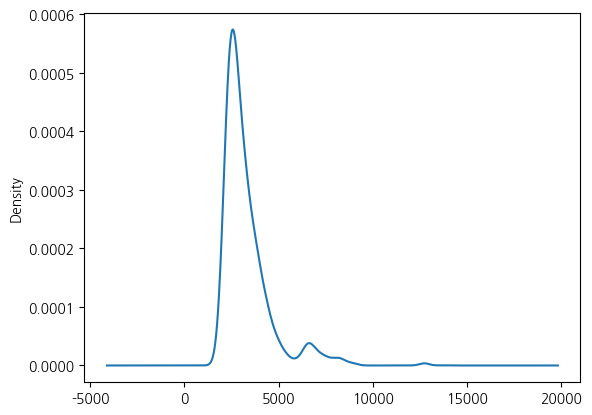

In [18]:
df['분양가'].plot(kind='kde');

---
> ## **Hexbin**
> - 고밀도 산점도 그래프
> - x,y 키값 모두 필요
> - x,y 모두 numeric
> - 데이터의 밀도 추정
---

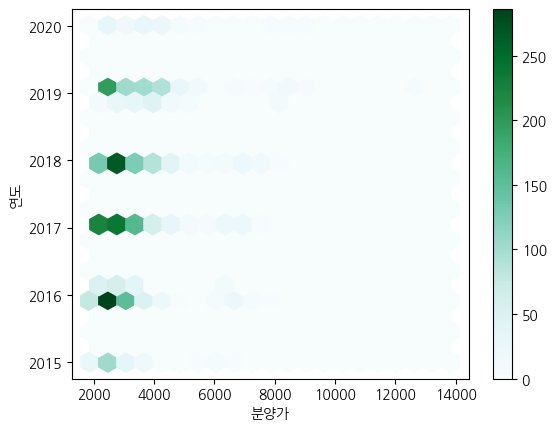

In [19]:
df.plot(kind='hexbin',x='분양가',y='연도',gridsize=20);

---
> ## **박스플롯**
---

In [20]:
df_seoul

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3178,서울,102㎡초과,2020,1,8779
3234,서울,60㎡이하,2020,2,8193
3235,서울,60㎡초과 85㎡이하,2020,2,8140
3236,서울,85㎡초과 102㎡이하,2020,2,13835


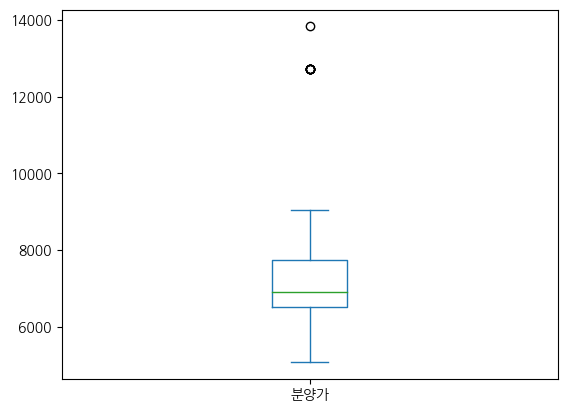

In [21]:
df_seoul['분양가'].plot(kind='box');

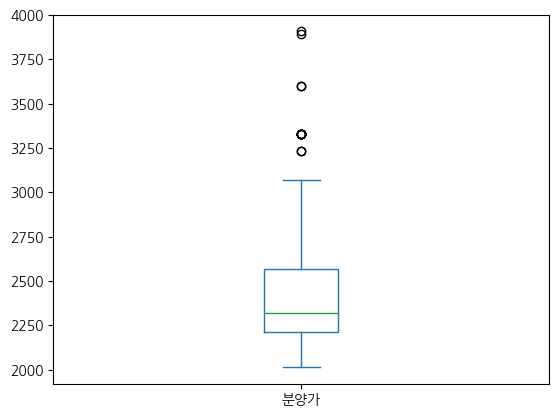

In [22]:
df_gang = df.loc[df['지역']=='강원']
df_gang['분양가'].plot(kind='box');

<AxesSubplot: xlabel='지역', ylabel='분양가'>

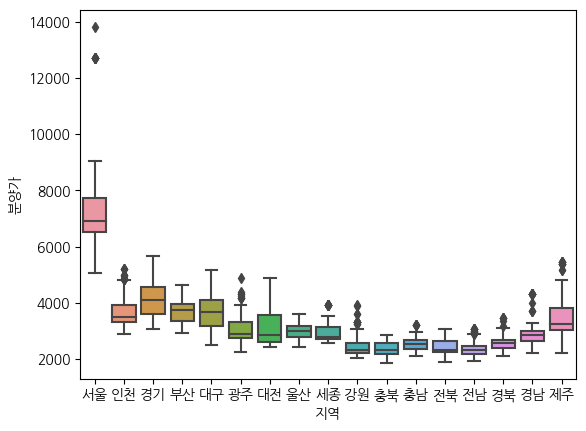

In [23]:
import seaborn as sns
sns.boxplot(data = df,y='분양가', x = '지역')

---
> ## **Pie 그래프**
---

In [24]:
df1 = df.groupby('연도')['분양가'].count()
df2 = pd.DataFrame(df1)
df2

,분양가
연도,
2015,192
2016,780
2017,771
2018,716
2019,716
2020,118


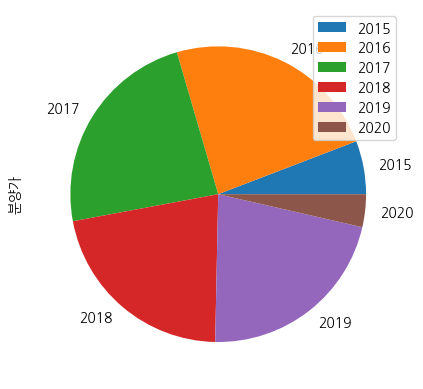

In [25]:
df2.plot(y='분양가',kind='pie');

---
> ## **scatter plot(산점도 그래프)**
> - 점으로 데이터 표기
> - x,y 값을 넣어줘야만 함
> - x,y 축을 지정하면 그에 맞는 데이터 분포도 볼 수 있다
> - numeric 한 column만 지정
---

In [26]:
df

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488
...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065
3289,경남,85㎡초과 102㎡이하,2020,2,3247
3290,제주,60㎡이하,2020,2,4039
3291,제주,60㎡초과 85㎡이하,2020,2,3962


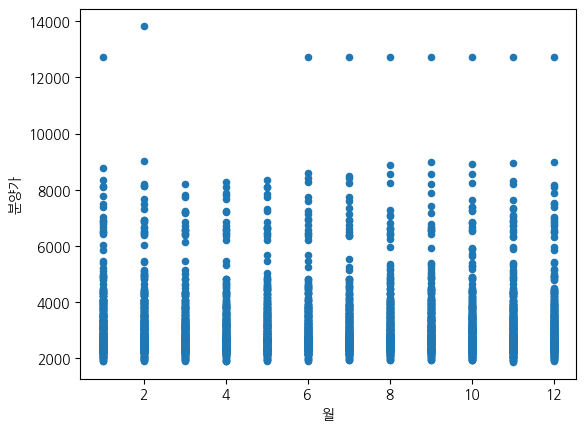

In [27]:
df.plot(x='월',y='분양가',kind='scatter');

---
> # **_Pandas의 시각화 기능_**
---

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
np.random.seed(0)
df1= pd.DataFrame(np.random.randn(100,3),
                  index = pd.date_range('1/1/2018', periods =100),
                  columns = ['A','B','C']).cumsum()
df1.tail()

,A,B,C
2018-04-06,9.396256,6.282026,-11.198087
2018-04-07,10.086074,7.583872,-11.826175
2018-04-08,9.605047,9.887789,-12.886190
2018-04-09,9.469097,11.024680,-12.788465
2018-04-10,10.052051,10.625231,-12.418409


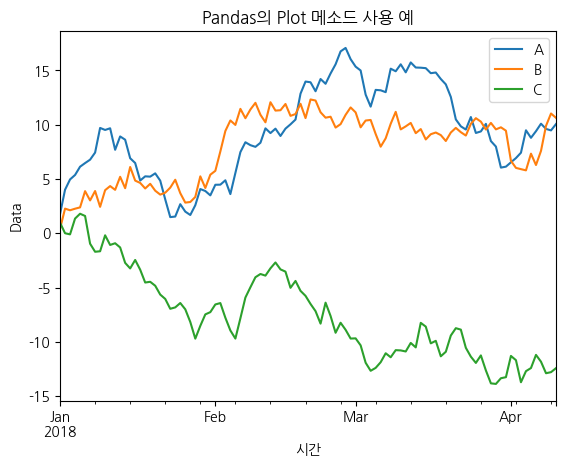

In [30]:
df1.plot()
plt.title('Pandas의 Plot 메소드 사용 예')
plt.xlabel('시간')
plt.ylabel('Data')
plt.show();

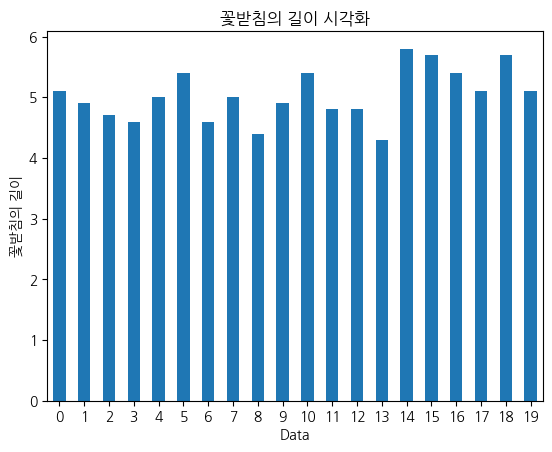

In [31]:
import seaborn as sns
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

iris.sepal_length[:20].plot(kind='bar',rot=0)
plt.title("꽃받침의 길이 시각화")
plt.xlabel('Data')
plt.ylabel('꽃받침의 길이')
plt.show();

In [32]:
iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


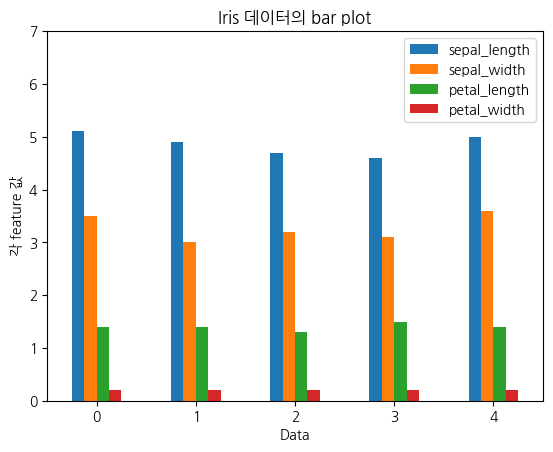

In [33]:
iris[:5].plot.bar(rot=0)
plt.title('Iris 데이터의 bar plot')
plt.xlabel('Data')
plt.ylabel('각 feature 값')
plt.ylim(0,7)
plt.show();

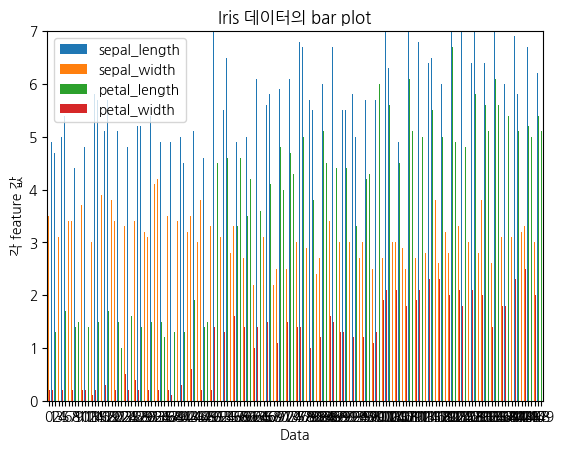

In [34]:
iris.plot.bar(rot=0)
plt.title('Iris 데이터의 bar plot')
plt.xlabel('Data')
plt.ylabel('각 feature 값')
plt.ylim(0,7)
plt.show();

In [35]:
df2 = iris.groupby(iris.species).mean()
df2.columns.name='feature'
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


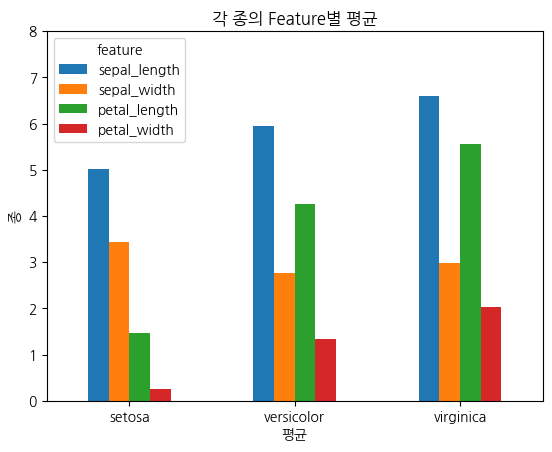

In [36]:
df2.plot.bar(rot=0)
plt.title('각 종의 Feature별 평균')
plt.xlabel('평균')
plt.ylabel('종')
plt.ylim(0,8)
plt.show();

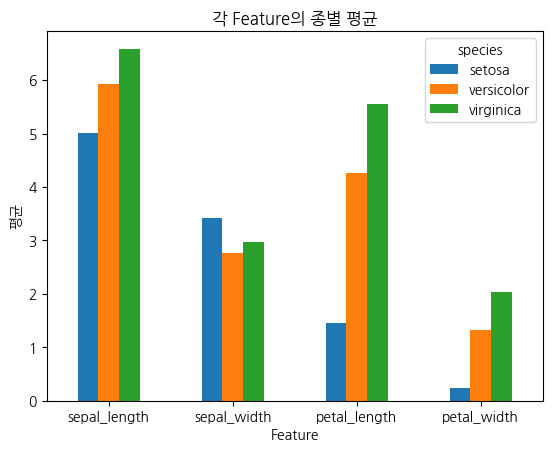

In [37]:
df2.T.plot.bar(rot=0)
plt.title('각 Feature의 종별 평균')
plt.xlabel('Feature')
plt.ylabel('평균')
plt.show();

In [38]:
df3 = titanic.pclass.value_counts()
df3

3    491
1    216
2    184
Name: pclass, dtype: int64

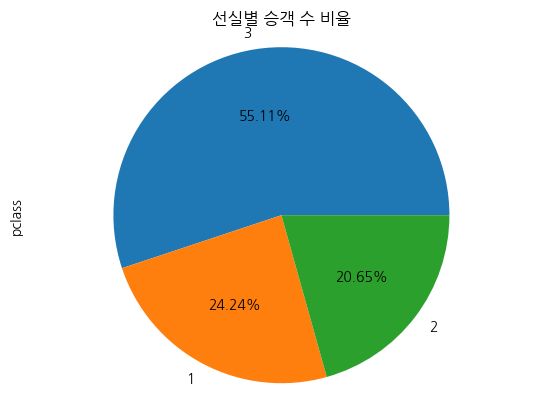

In [39]:
df3.plot.pie(autopct='%.2f%%')
plt.title('선실별 승객 수 비율')
plt.axis('equal')
plt.show();

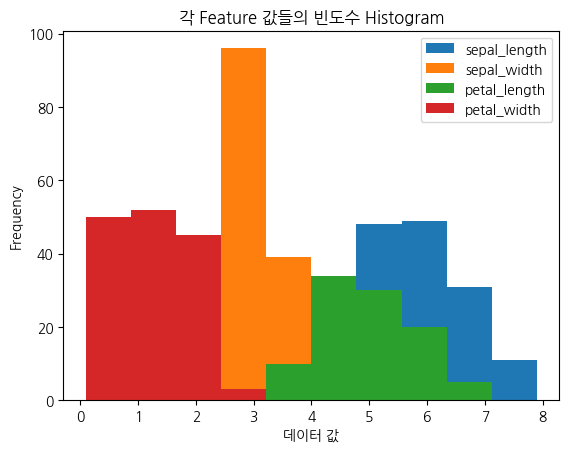

In [40]:
iris.plot.hist()
plt.title('각 Feature 값들의 빈도수 Histogram')
plt.xlabel('데이터 값')
plt.show();

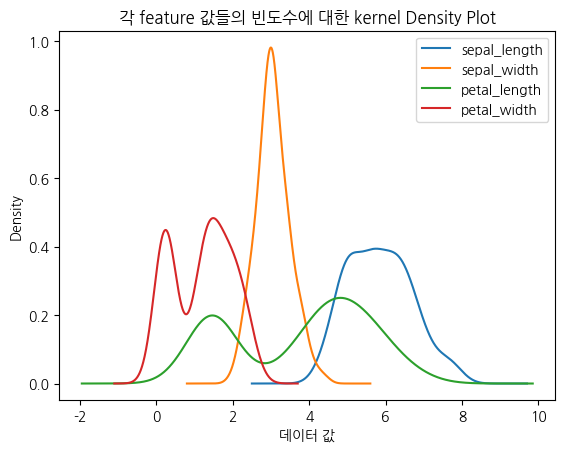

In [41]:
iris.plot.kde()
plt.title('각 feature 값들의 빈도수에 대한 kernel Density Plot')
plt.xlabel('데이터 값')
plt.show();

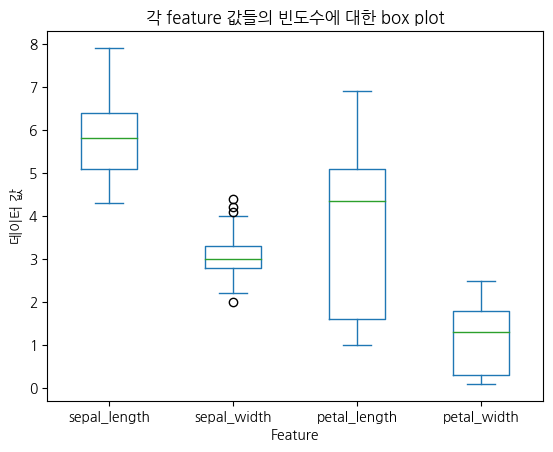

In [42]:
iris.plot.box()
plt.title('각 feature 값들의 빈도수에 대한 box plot')
plt.xlabel('Feature')
plt.ylabel('데이터 값')
plt.show();

#### plt.tight_layout

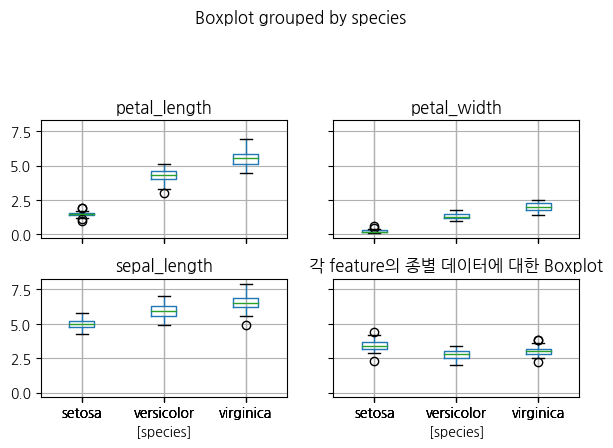

In [43]:
iris.boxplot(by = 'species')
plt.tight_layout(pad=3,h_pad=1)
plt.title('각 feature의 종별 데이터에 대한 Boxplot')
plt.show();

---
> # **_시각화_**
> - 참고사이트 : https://wikidocs.net/92071
---

---
> ## **선그래프**
---

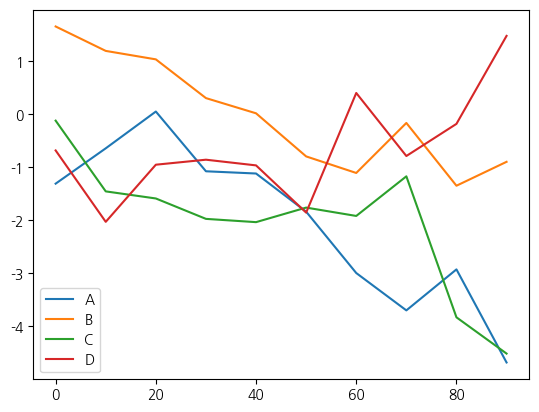

In [44]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(10,4).cumsum(axis=0),
                  columns =['A','B','C','D'],
                  index=np.arange(0,100,10))
df.plot();

---
> ## **막대 그래프**
---

In [45]:
df = pd.DataFrame(np.random.rand(6,4),
                  index = ['one','two','three','four','five','six'],
                  columns=pd.Index(['A','B','C','D'],name='Genus'))
df

Genus,A,B,C,D
one,0.360546,0.828657,0.924967,0.046007
two,0.232627,0.348519,0.814966,0.985491
three,0.968972,0.904948,0.296556,0.992011
four,0.249420,0.105906,0.950953,0.233420
five,0.689768,0.058356,0.730709,0.881720
six,0.272437,0.379057,0.374296,0.748788


#### 컬럼별 데이터 막대에 누적

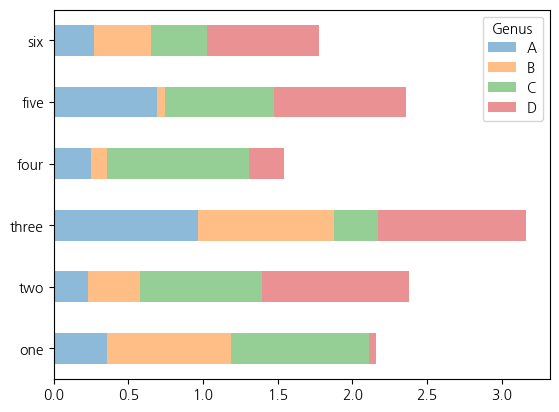

In [46]:
df.plot.barh(stacked=True,alpha=0.5);

#### crosstab

In [47]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [48]:
party_counts = party_counts.loc[:,2:5]
display(party_counts);
party_pct = party_counts.div(party_counts.sum(1),axis=0)
party_pct

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


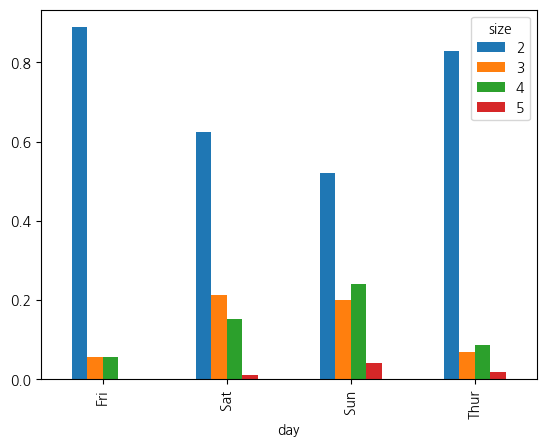

In [49]:
party_pct.plot.bar();

#### 요일별 파티 규모

In [50]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


#### seaborn 의 data 인자에는 DataFrame 넣음

<AxesSubplot: xlabel='tip_pct', ylabel='day'>

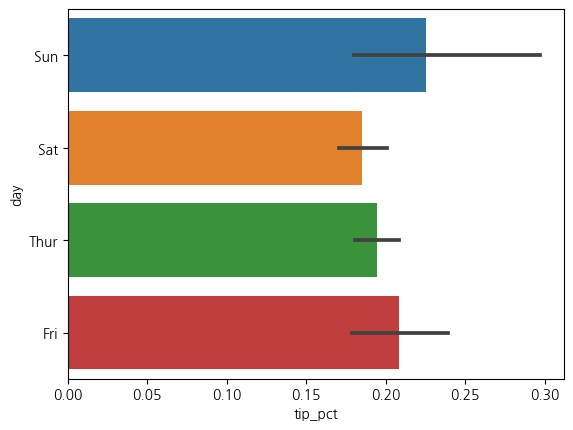

In [51]:
sns.barplot(x='tip_pct',y='day',data =tips,orient='h')

<AxesSubplot: xlabel='tip_pct', ylabel='day'>

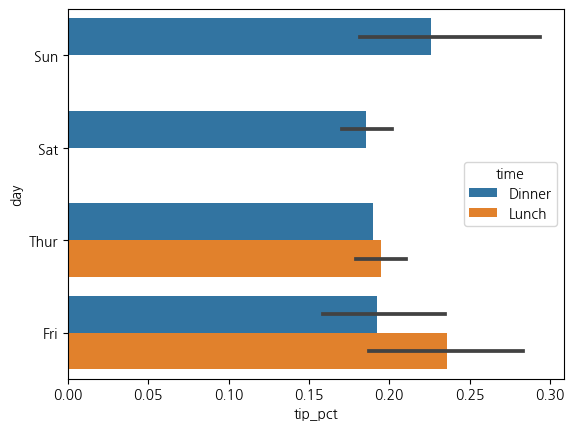

In [52]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h')

---
> ## **히스토그램과 밀도 그래프**
---

#### 연속된 확률분포를 그림(커널 밀도 추정)

<AxesSubplot: ylabel='Density'>

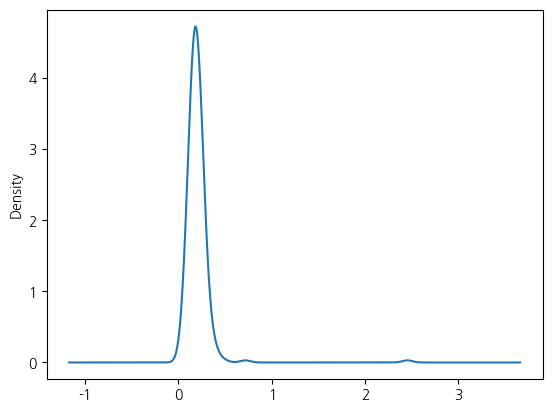

In [53]:
tips['tip_pct'].plot.density()

#### **히스토그램과 밀도 그래프 한번에 : displot**

C:\Users\skyme\AppData\Local\Temp\ipykernel_25236\958049183.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, bins= 100, color='k');


<AxesSubplot: ylabel='Density'>

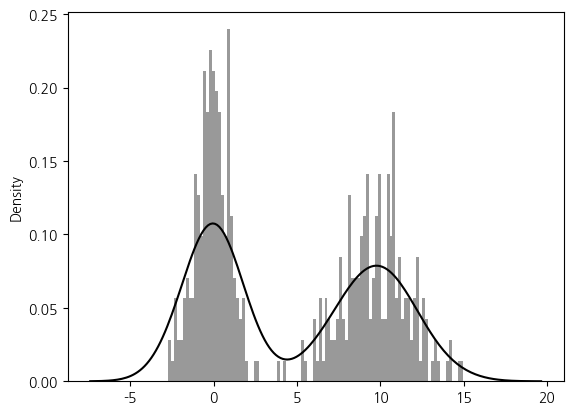

In [54]:
import warnings
comp1=np.random.normal(0,1,size=200)
comp2=np.random.normal(10,2,size=200)
values=pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values, bins= 100, color='k');
warnings.filterwarnings(action='ignore')